In [1]:
import numpy as np
from keras.layers import Input, Dense, Activation, BatchNormalization
from keras.layers import ZeroPadding2D, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import h5py
import matplotlib.pyplot as plt


y = 2


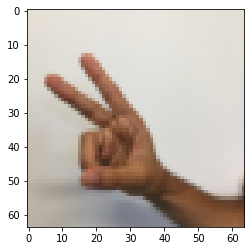

In [2]:
train_dataset = h5py.File('datasign/train_signs.h5', "r")
train_X = np.array(train_dataset["train_set_x"][:]) # your train set features
train_Y = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasign/test_signs.h5', "r")
test_X = np.array(test_dataset["test_set_x"][:]) # your test set features
test_Y = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y = test_Y.reshape((1, test_Y.shape[0]))

index = 6
plt.imshow(train_X[index])
print ("y = " + str(np.squeeze(train_Y[:, index])))

In [3]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

train_Y = convert_to_one_hot(train_Y, 6)
test_Y = convert_to_one_hot(test_Y, 6)

train_X = train_X/255.
test_X = test_X/255.
print('train_X shape = ',train_X.shape)
print('train_Y shape = ',train_Y.shape)
print('test_X shape = ',test_X.shape)
print('test_Y shape = ',test_Y.shape)

train_X shape =  (1080, 64, 64, 3)
train_Y shape =  (1080, 6)
test_X shape =  (120, 64, 64, 3)
test_Y shape =  (120, 6)


In [4]:
def sign_cnn(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(6, (5,5))(X_input)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(2,2)(X)


    X = Conv2D(16, (5,5))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(2,2)(X)

    X = Conv2D(21, (5,5))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(2,2)(X)

    X = Flatten()(X)
    X = Dense(84, activation = 'sigmoid')(X)
    X = Activation('relu')(X)

    X = Dense(6, activation = 'softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'sign_cnn')
    return model

In [5]:
Sign_cnn = sign_cnn(train_X.shape[1:])

In [6]:
Sign_cnn.compile(optimizer = 'adam',loss ='categorical_crossentropy', metrics = ["accuracy"])

In [12]:
Sign_cnn.fit(x = train_X, y = train_Y, epochs = 10, batch_size = 32)

Epoch 1/10
34/34 [==============================] - 6s 170ms/step - loss: 0.0790 - accuracy: 0.9963
Epoch 2/10
34/34 [==============================] - 5s 161ms/step - loss: 0.0634 - accuracy: 0.9981
Epoch 3/10
34/34 [==============================] - 6s 162ms/step - loss: 0.0481 - accuracy: 0.9991
Epoch 4/10
34/34 [==============================] - 6s 162ms/step - loss: 0.0400 - accuracy: 0.9981
Epoch 5/10
34/34 [==============================] - 6s 163ms/step - loss: 0.0326 - accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 6s 166ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 6s 164ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 8/10
34/34 [==============================] - 6s 170ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 9/10
34/34 [==============================] - 6s 170ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 10/10
34/34 [==============================] - 6s 168ms/step - loss: 0.0154 - accuracy: 1.0000

In [13]:
preds_train = Sign_cnn.evaluate(x = train_X, y = train_Y)
preds_test = Sign_cnn.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

4/4 [==============================] - 0s 40ms/step - loss: 0.1807 - accuracy: 0.9500

Loss = 0.023539142683148384
Train Accuracy = 0.9990741014480591

Loss = 0.1806998997926712
Test Accuracy = 0.949999988079071


In [14]:
Sign_cnn.summary()

______________
activation (Activation)      (None, 60, 60, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 21)          8421      
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 21)          84    

y_predict = 1


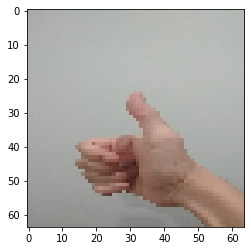

In [21]:
img_path = 'images/thien_1.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0

y = list(Sign_cnn.predict(x)[0])
print('y_predict =',y.index(max(y)))